In [388]:
import pandas as pd
import matplotlib.pyplot as plt

In [406]:
# import ../data/data.txt
data = pd.read_csv('../data/data.txt', sep=";",    names = ['id', 'time_py', 'type_search', 'state', 'time_java_c', 'apodo', 'time_java_s'])
# Trim
data['state'] = data['state'].str.strip()
data['type_search'] = data['type_search'].str.strip()

# Filtramos los datos
data = data.sort_values(by=['id', 'state'])
data.head()

,id,time_py,type_search,state,time_java_c,apodo,time_java_s
1,3048bd62-1bb6-11ee-a034-b1971887673a,1.688618e+09,buscar por productos,fin,1688618004,ropa,1688618004
0,3048bd62-1bb6-11ee-a034-b1971887673a,1.688618e+09,buscar por productos,ini,1688618003,ropa,1688618003
215,3049b960-1bb6-11ee-a034-b1971887673a,1.688618e+09,buscar por productos,fin,1688618034,compu,1688618034
214,3049b960-1bb6-11ee-a034-b1971887673a,1.688618e+09,buscar por productos,ini,1688618033,compu,1688618033
403,304aacc6-1bb6-11ee-a034-b1971887673a,1.688618e+09,buscar por productos,fin,1688618064,hogar,1688618064


In [407]:
# Creamos un arreglo con type_search='buscar por productos'
# Y otro con type_search='buscar por categorias'
data_products = data.loc[data['type_search'] == 'buscar por productos']
data_categories = data.loc[data['type_search'] == 'buscar por categorias']

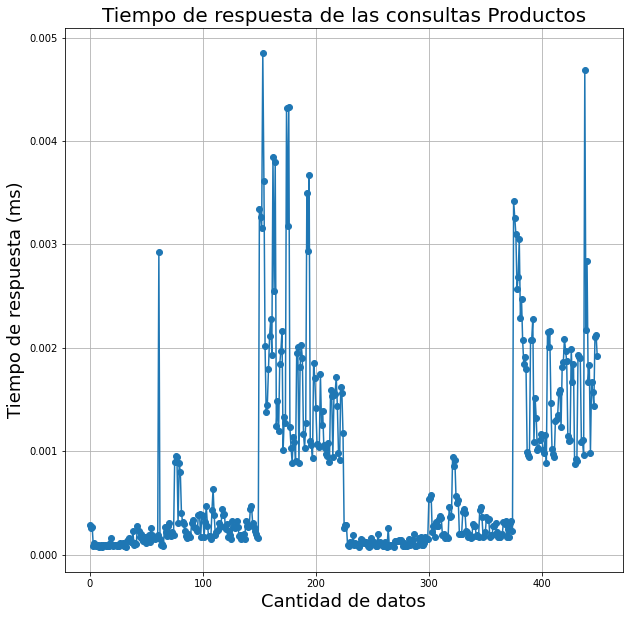

In [408]:
data_to_plot_products = data_products['time_py'].tolist()
temp_prod = []
for i in range(0, len(data_to_plot_products), 2):
    temp_prod.append(data_to_plot_products[i] - data_to_plot_products[i+1] )


fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Tiempo de respuesta de las consultas Productos', fontsize=20)
ax.set_xlabel('Cantidad de datos', fontsize=18)
ax.set_ylabel('Tiempo de respuesta (ms)', fontsize=18)
ax.grid(True)
ax.plot(temp_prod, 'o-', label='Python')
plt.savefig('../data/productos.png')

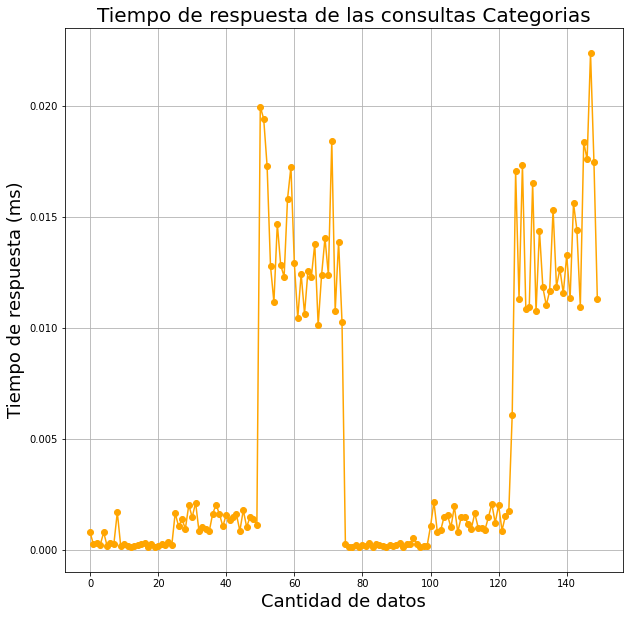

In [409]:
data_to_plot_categories = data_categories['time_py'].tolist()
temp_cat = []
for i in range(0, len(data_to_plot_categories), 2):
    temp_cat.append(data_to_plot_categories[i] - data_to_plot_categories[i+1] )


fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Tiempo de respuesta de las consultas Categorias', fontsize=20)
ax.set_xlabel('Cantidad de datos', fontsize=18)
ax.set_ylabel('Tiempo de respuesta (ms)', fontsize=18)
ax.grid(True)
ax.plot(temp_cat, 'o-', label='Python', color='orange')


In [323]:

def plot_data(data, title):
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.plot(data)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Número de consulta', fontsize=18)
    ax.set_ylabel('Tiempo en milisegundos', fontsize=16)
    ax.grid(True)
    plt.show()


def plot_comparative(data_1, data_2, title):
    plt.figure(figsize=(15, 6))
    plt.plot(data_1)
    plt.plot(data_2)
    plt.legend(['Products', 'Categories'], shadow=True, loc='upper right')
    plt.title(title, fontsize=20)
    plt.xlabel('Número de consulta', fontsize=18)
    plt.ylabel('Diferencia en milisegundos', fontsize=18)
    plt.grid(True)
    plt.show()


In [324]:
def loadData( path ):
    names = ['id', 'time_py', 'type_search', 'state', 'time_java_c', 'apodo', 'time_java_s']
    data = pd.read_csv(path, sep=';', names=names)
    data = data.sort_values(by=['id', 'state'])

    data_to_plot = data['time_py'].tolist()
    temp = []
    for i in range(0, len(data_to_plot), 2):
        temp.append(data_to_plot[i] - data_to_plot[i+1] )
    return data, temp

In [325]:
paths = {
    'p_100': '../data/100_products.txt',
    'c_100': '../data/100_categories.txt',
    'p_1000': '../data/1000_products.txt',
    'c_1000': '../data/1000_categories.txt',
    'p_10000': '../data/10000_products.txt',
    'c_10000': '../data/10000_categories.txt',
    }

to_plot = {
    'p_100': [],
    'c_100': [],
    'p_1000': [],
    'c_1000': [],
    'p_10000': [],
    'c_10000': [],
    }

for key, value in paths.items():
    data, temp = loadData(value)
    to_plot[key] = temp

# Productos y categorias - 100 data

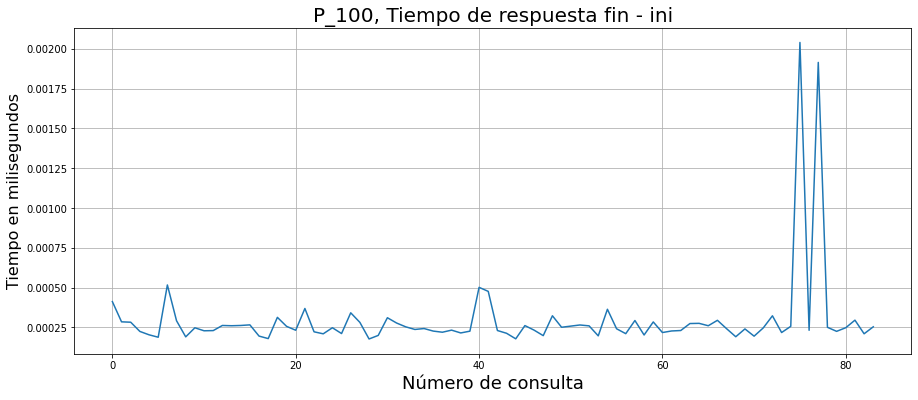

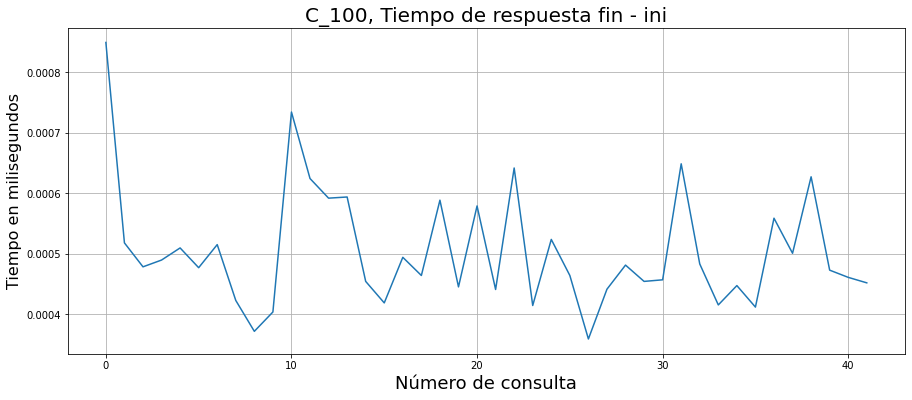

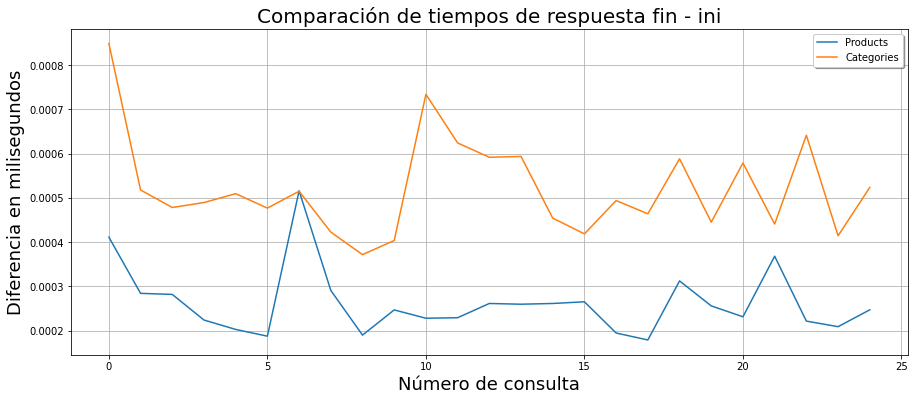

In [326]:
plot_data(to_plot['p_100'], 'P_100, Tiempo de respuesta fin - ini')
plot_data(to_plot['c_100'], 'C_100, Tiempo de respuesta fin - ini')
plot_comparative(to_plot['p_100'][:25], to_plot['c_100'][:25], 'Comparación de tiempos de respuesta fin - ini')

# Productos y categorias - 1000 data

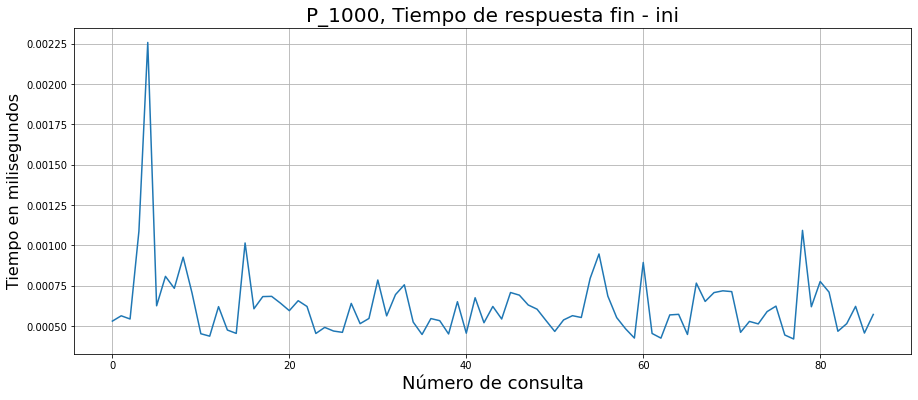

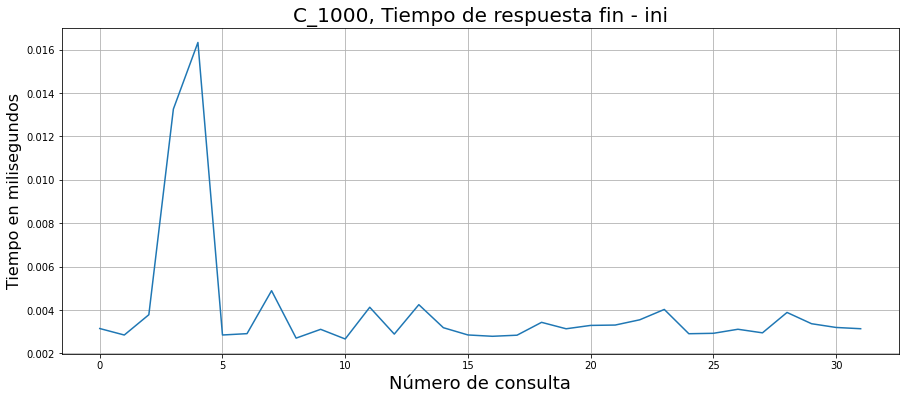

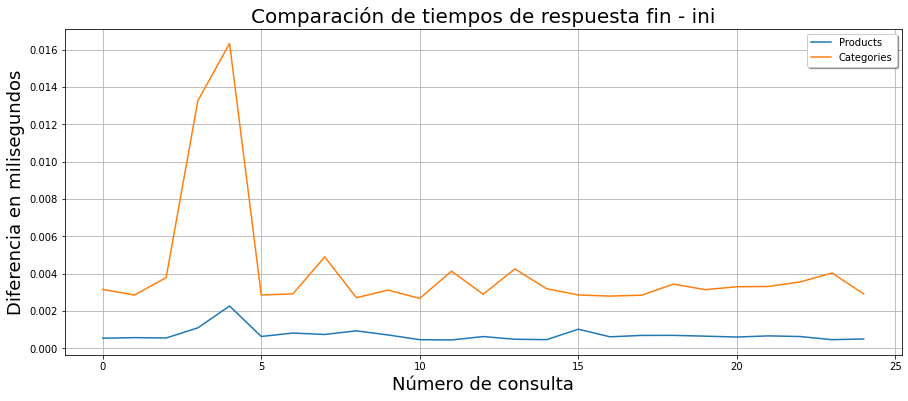

In [327]:
plot_data(to_plot['p_1000'], 'P_1000, Tiempo de respuesta fin - ini')
plot_data(to_plot['c_1000'], 'C_1000, Tiempo de respuesta fin - ini')
plot_comparative(to_plot['p_1000'][:25], to_plot['c_1000'][:25], 'Comparación de tiempos de respuesta fin - ini')

# Productos y categorias - 10000 data

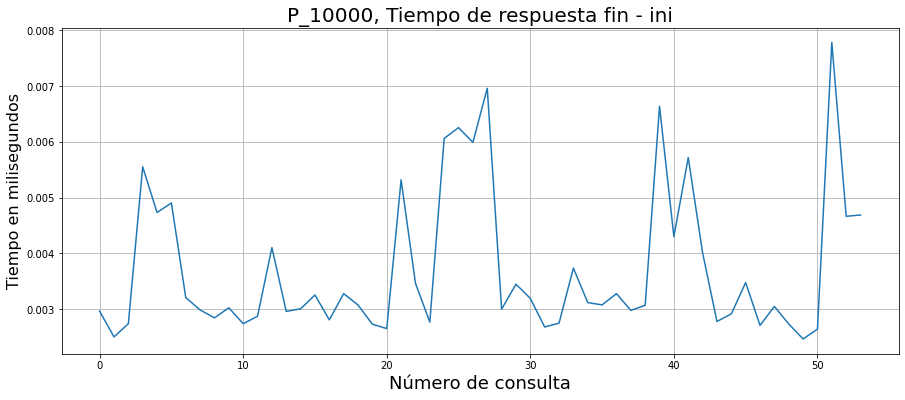

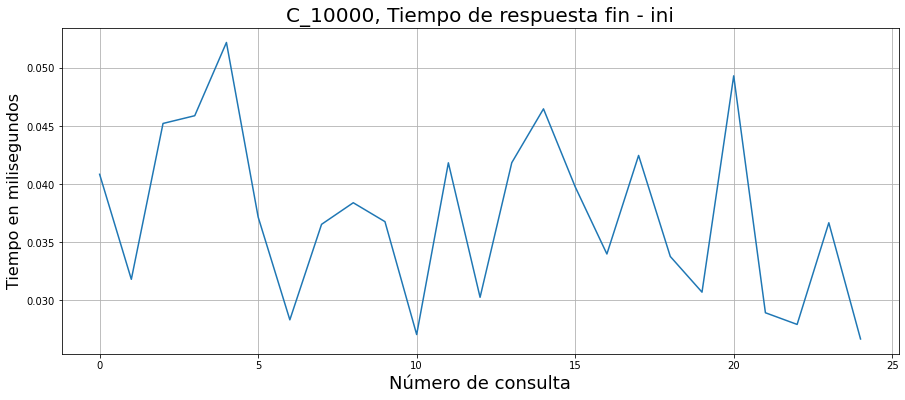

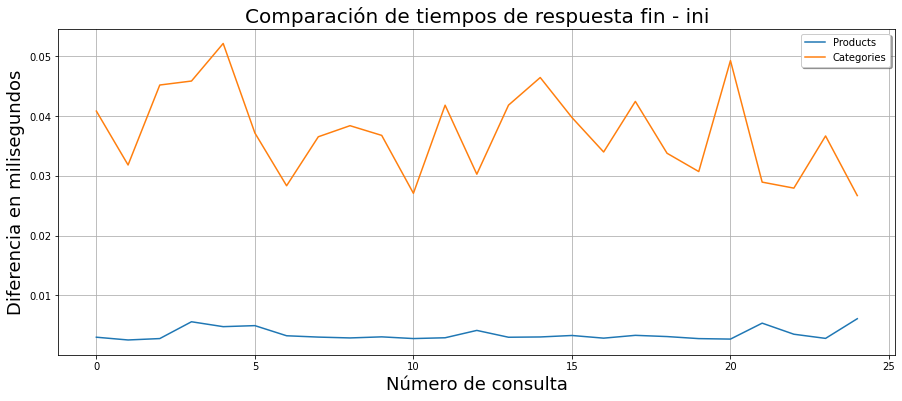

In [328]:
plot_data(to_plot['p_10000'], 'P_10000, Tiempo de respuesta fin - ini')
plot_data(to_plot['c_10000'], 'C_10000, Tiempo de respuesta fin - ini')
plot_comparative(to_plot['p_10000'][:25], to_plot['c_10000'][:25], 'Comparación de tiempos de respuesta fin - ini')

## Comparativa final

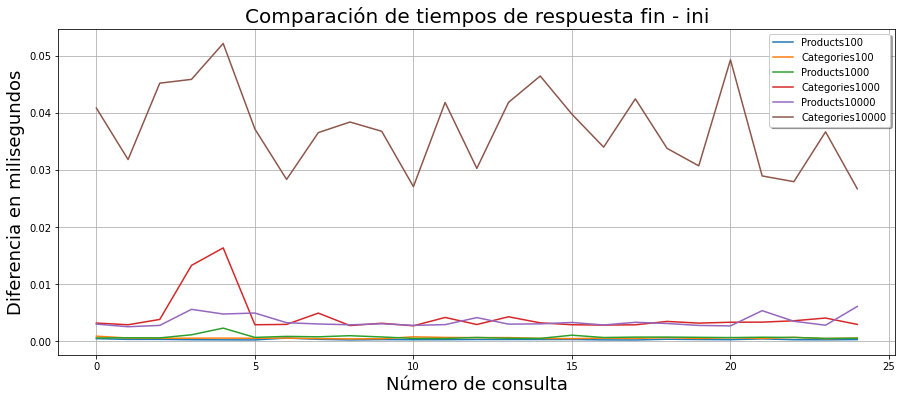

In [329]:
# Comparando al menos 25 consultas de cada uno de los archivos de datos

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(to_plot['p_100'][:25]); ax.plot(to_plot['c_100'][:25]);
ax.plot(to_plot['p_1000'][:25]); ax.plot(to_plot['c_1000'][:25]);
ax.plot(to_plot['p_10000'][:25]); ax.plot(to_plot['c_10000'][:25]);
ax.set_title('Comparación de tiempos de respuesta fin - ini', fontsize=20)
ax.set_xlabel('Número de consulta', fontsize=18)
ax.set_ylabel('Diferencia en milisegundos', fontsize=18)
ax.grid(True)
ax.legend(['Products100', 'Categories100','Products1000', 'Categories1000','Products10000', 'Categories10000'], shadow=True, loc='upper right')

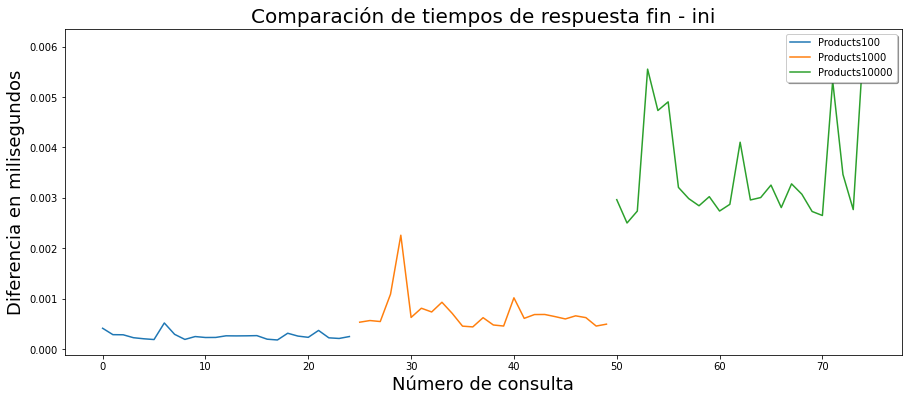

In [330]:
x = [ i for i in range(25)]
y = [i for i in range(25, 50)]
z = [i for i in range(50, 75)]

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x, to_plot['p_100'][:25])
ax.plot(y, to_plot['p_1000'][:25])
ax.plot(z, to_plot['p_10000'][:25])

ax.set_title('Comparación de tiempos de respuesta fin - ini', fontsize=20)
ax.set_xlabel('Número de consulta', fontsize=18)
ax.set_ylabel('Diferencia en milisegundos', fontsize=18)


ax.legend(['Products100','Products1000', 'Products10000',], shadow=True, loc='upper right')

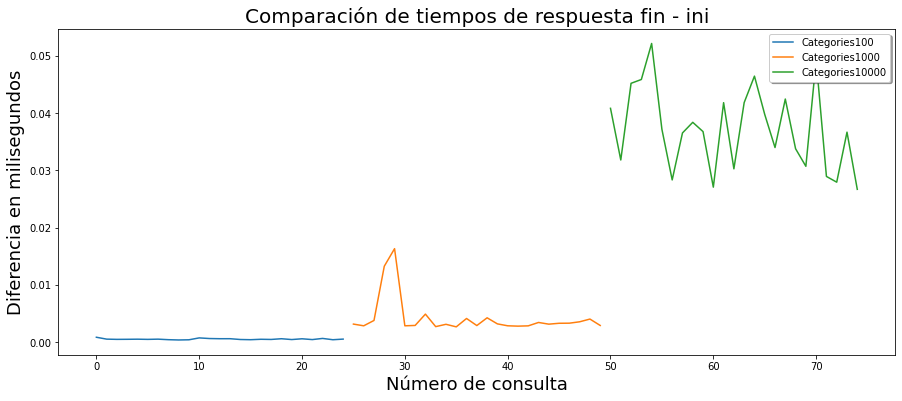

In [331]:
x = [ i for i in range(25)]
y = [i for i in range(25, 50)]
z = [i for i in range(50, 75)]

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x, to_plot['c_100'][:25])
ax.plot(y, to_plot['c_1000'][:25])
ax.plot(z, to_plot['c_10000'][:25])

ax.set_title('Comparación de tiempos de respuesta fin - ini', fontsize=20)
ax.set_xlabel('Número de consulta', fontsize=18)
ax.set_ylabel('Diferencia en milisegundos', fontsize=18)


ax.legend(['Categories100','Categories1000', 'Categories10000',], shadow=True, loc='upper right')